In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nhanes.load import load_NHANES_data, load_NHANES_metadata

In [2]:
nhanes_data = load_NHANES_data()

In [5]:
nhanes_data.TotalSugarsGm_DR2TOT

SEQN
93703.0        NaN
93704.0     134.37
93705.0      43.04
93706.0        NaN
93707.0      85.81
             ...  
102952.0     52.84
102953.0       NaN
102954.0     87.58
102955.0     94.09
102956.0    187.54
Name: TotalSugarsGm_DR2TOT, Length: 8366, dtype: float64

In [6]:
nhanes_data.BodyMassIndexKgm2

SEQN
93703.0     17.5
93704.0     15.7
93705.0     31.7
93706.0     21.5
93707.0     18.1
            ... 
102952.0    20.0
102953.0    35.8
102954.0    26.1
102955.0    45.6
102956.0    36.1
Name: BodyMassIndexKgm2, Length: 8366, dtype: float64

In [8]:
bmi_sugar = nhanes_data[["TotalSugarsGm_DR2TOT", "BodyMassIndexKgm2"]]
bmi_sugar = bmi_sugar.dropna()
bmi_sugar.head()

,TotalSugarsGm_DR2TOT,BodyMassIndexKgm2
SEQN,,
93704.0,134.37,15.7
93705.0,43.04,31.7
93707.0,85.81,18.1
93708.0,42.37,23.7
93711.0,163.76,21.3


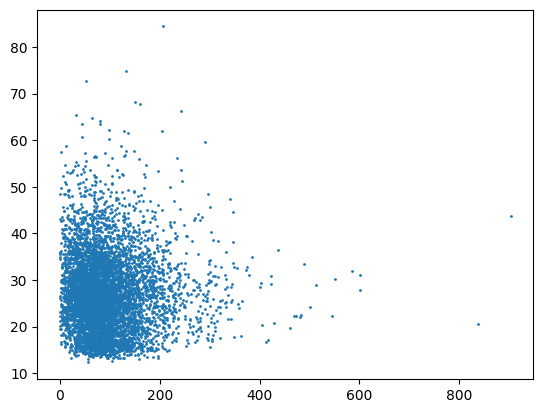

In [11]:
plt.scatter(bmi_sugar.TotalSugarsGm_DR2TOT.values, bmi_sugar.BodyMassIndexKgm2.values, s=1)
plt.show()

In [12]:
sugar_quantiles_low = np.quantile(bmi_sugar.TotalSugarsGm_DR2TOT.values, 0.025)
sugar_quantiles_high = np.quantile(bmi_sugar.TotalSugarsGm_DR2TOT.values, 0.975)
sugar_quantiles_low, sugar_quantiles_high

(11.4825, 259.71000000000004)

In [13]:
bmi_quantiles_low = np.quantile(bmi_sugar.BodyMassIndexKgm2.values, 0.025)
bmi_quantiles_high = np.quantile(bmi_sugar.BodyMassIndexKgm2.values, 0.975)
bmi_quantiles_low, bmi_quantiles_high

(14.8, 45.9)

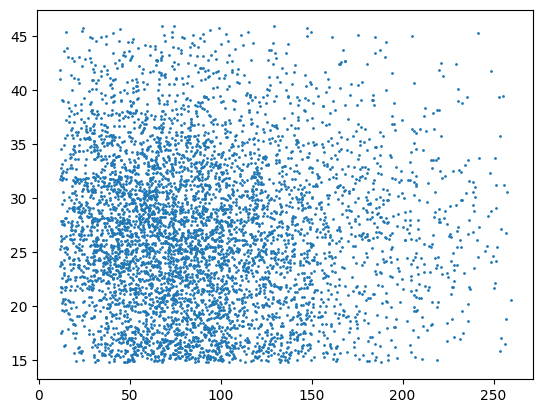

In [14]:
bmi_sugar_clean = bmi_sugar.query("TotalSugarsGm_DR2TOT >= 11.4825").query("TotalSugarsGm_DR2TOT <= 259.71")
bmi_sugar_clean = bmi_sugar_clean.query("BodyMassIndexKgm2 >= 14.8").query("BodyMassIndexKgm2 <= 45.9")
plt.scatter(bmi_sugar_clean.TotalSugarsGm_DR2TOT.values, bmi_sugar_clean.BodyMassIndexKgm2.values, s=1)
plt.show()

In [15]:
pearson_res = stats.pearsonr(bmi_sugar_clean.TotalSugarsGm_DR2TOT.values, bmi_sugar_clean.BodyMassIndexKgm2.values)
pearson_res

PearsonRResult(statistic=-0.03041666437177656, pvalue=0.02375323125687201)

In [21]:
r = pearson_res.statistic
t_r = r * np.sqrt(len(bmi_sugar_clean.TotalSugarsGm_DR2TOT.values) - 2) / np.sqrt(1 - np.power(r, 2))
t_r

-2.2617229893455866

In [22]:
p_value = stats.t.pdf(t_r, df=len(bmi_sugar_clean.TotalSugarsGm_DR2TOT.values) - 2)
p_value

0.030932170803180354

https://stats.stackexchange.com/questions/333441/significant-p-value-but-no-correlation

p_value of 0.031 has no meaning but it's low because we have a lot of data points. In theory, this means we should reject the null-hypothesis(H_0 that there is no correlation), but this doesn't make any sense practically.